<a href="https://colab.research.google.com/github/advcloud/colabtest/blob/main/face_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face detection using pre-trained model

We use following blog as a reference:
[Face detection with OpenCV and deep learning](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/)

Import required Python libraries

In [1]:

import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

Start webcam

In [5]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Click 'Capture' to make photo using your webcam.

In [6]:
image_file = take_photo()

<IPython.core.display.Javascript object>

Read, resize and display the image. 

400 300


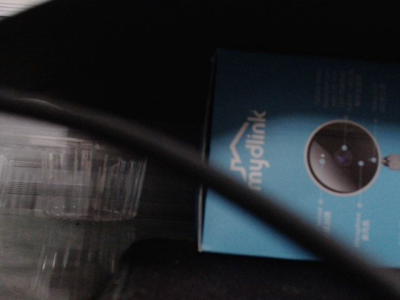

In [7]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

OpenCV’s deep learning face detector is based on the Single Shot Detector (SSD) framework with a ResNet base network. The network is defined and trained using the [Caffe Deep Learning framework](https://caffe.berkeleyvision.org/)

Download the pre-trained face detection model, consisting of two files:

- The network definition (deploy.prototxt)
- The learned weights (res10_300x300_ssd_iter_140000.caffemodel) 

In [8]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2022-04-29 06:04:57--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2022-04-29 06:04:57 (101 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2022-04-29 06:04:57--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

Load the pre-trained face detection network model from disk

In [9]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


Use the [dnn.blobFromImage](https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/) function to construct an input blob by resizing the image to a fixed 300x300 pixels and then normalizing it.


In [10]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))


Pass the blob through the neural network and obtain the detections and predictions.

In [11]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


Loop over the detections and draw boxes around the detected faces

In [12]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

Show the resulting image

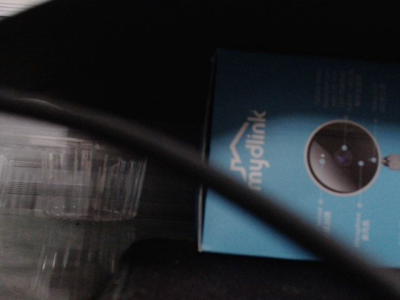

In [13]:
cv2_imshow(image)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1: Download face-mask-detector.zip 
Step 2: Put it in your Google Drive
Step 3: UnZip face-mask-detector.zip

In [14]:
# Ensure to use the GPU runtime

!nvidia-smi

Fri Apr 29 06:32:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |     60MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
# Clone our github repository to access utility files for data preparation
# Respository: https://github.com/deepme987/Tensorflow-Object-Detection

!git clone https://github.com/deepme987/Tensorflow-Object-Detection
%cd Tensorflow-Object-Detection

Cloning into 'Tensorflow-Object-Detection'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 59 (delta 27), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (59/59), done.
/content/Tensorflow-Object-Detection


In [16]:
# Upgrade pip to latest version
!pip install pip --upgrade

# Download Object Detection API and build necessary files

%cd /content
!git clone --quiet https://github.com/tensorflow/models.git

%cd /content/models/research/
# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
%cp object_detection/packages/tf2/setup.py .
!python -m pip install --use-feature=2020-resolver .

!python object_detection/builders/model_builder_tf2_test.py
%cd /content/Tensorflow-Object-Detection

     |████████████████████████████████| 2.1 MB 12.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
/content
/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.6/237.6 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 4.3 MB/s eta 0:00:00
  Pre

In [18]:
''' Download Dataset on your local machine and upload to /content/Tensorflow-Object-Detection'''
# Upload the dataset to colab

from google.colab import files
files.upload()

# Unzipping the content
!unzip archive.zip
!rm archive.zip

Saving archive.zip to archive.zip
Archive:  archive.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflatin

In [6]:
import random
import cv2
import glob
from google.colab.patches import cv2_imshow

# Change the extension accordingly if your dataset is not png
TEST_IMAGE_PATHS = glob.glob('images/*.png')

# Change the value of k to the number of images to display
try:
    images = random.sample(TEST_IMAGE_PATHS, k=3)
except:
    # Exception incase the value of k is higher than available samples
    images = TEST_IMAGE_PATHS


for image_path in images:
    print(image_path)
    img = cv2.imread(image_path)
    cv2_imshow(img)

In [20]:
# The dataset contains all annotations in xml format. 
# However, we need csv files for Object Detection
# Change <PATH TO ANNOTATIONS> to point annotation directory and
# <OUTPUT FILE NAME> as required filename.csv for custom dataset

# !python xml_to_csv.py --xml_path=<PATH TO ANNOTATIONS> --csv_output=<OUTPUT FILE NAME>

!python xml_to_csv.py --xml_path=annotations/ --csv_output=annotations.csv

Reading xml from folder annotations/
Successfully converted xml to csv.


In [7]:
# Read all annotations from the generated csv

import pandas as pd
data = pd.read_csv("annotations.csv")
data

FileNotFoundError: ignored

In [22]:
# Split data into train-test
# Avoid using sklearn's train_test_split to split the data as it may use 
# same image in train as well as test for different annotation 

from sklearn.model_selection import GroupShuffleSplit

# You can change the test_size below (ideally between 0.2-0.4)
train_inds, test_inds = next(GroupShuffleSplit(test_size=0.30, random_state = 7).split(data, groups=data['filename']))

train = data.iloc[train_inds]
test = data.iloc[test_inds]


# Export the csv files, we'll use these for generating tfrecords
train.to_csv("train_labels.csv")
test.to_csv("test_labels.csv")

In [23]:
# Generate labelmap.pbtxt based on training labels.

ob = "{"
cb = "}"
nl = "\n"

string = ""
for i, class_ in enumerate(set(train["class"])):
    string += f"""
item {ob} 
  id: {i+1}
  name: '{class_}'
{cb}"""

with open("labelmap.pbtxt", 'w') as file:
    file.write(string)

In [24]:
# Check the labelmap file

!cat labelmap.pbtxt


item { 
  id: 1
  name: 'without_mask'
}
item { 
  id: 2
  name: 'with_mask'
}
item { 
  id: 3
  name: 'mask_weared_incorrect'
}

In [25]:
# Tensorflow uses tfrecord files for training
# To Generate tfrecord files based on input data (images and csv files).
# For huge datasets, this step may take long time 
# May take hours for dataset above 5GB

# Change the image path accordingly for your custom dataset
!python generate_tfrecord.py --csv_input train_labels.csv --output_path train.record --img_path="images/" --label_map labelmap.pbtxt
!python generate_tfrecord.py --csv_input test_labels.csv --output_path test.record --img_path="images/" --label_map labelmap.pbtxt

Successfully created the TFRecords: /content/Tensorflow-Object-Detection/train.record
Successfully created the TFRecords: /content/Tensorflow-Object-Detection/test.record


In [26]:
# Model vars

# Number of training steps.
num_steps = 5000

# Number of evaluation steps.
num_eval_steps = 100
  

# A batch size determines how many inputs the model will consider at once
# for training. Generally a higher batch size increases convergence of the model,
# but requires higher graphic memory.
# The batch sizes in the given list are for Google Colab (Tesla K80)
# You may increase or decrease them if you're running them locally.

# We are still testing batch sizes for other models.
# This list will be updated for other available models after testing them!

MODELS_CONFIG = {
    'efficientdet_d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'batch_size': 8
    },
}

# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'efficientdet_d0'

# Load variables related to selection model
MODEL = MODELS_CONFIG[selected_model]['model_name']
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']
batch_size = MODELS_CONFIG[selected_model]['batch_size']

In [27]:
# Initialize directory paths required 

DATASET_PATH = "/content/Tensorflow-Object-Detection/"

# We save all the COCO downloaded models under fine_tune_models
!mkdir {DATASET_PATH}"fine_tune_models"

DEST_DIR = DATASET_PATH + "fine_tune_models/" + MODEL

# This is the directory where we will store our trained checkpoints
model_dir = DATASET_PATH + MODEL

!mkdir {model_dir}

In [8]:
# Your directory should look similar to this

!ls

drive  sample_data


In [29]:
import os

%cd /content/models/research

import shutil
import glob
import urllib.request
import tarfile

MODEL_FILE = MODEL + '.tar.gz'
# This is the base link for all the models pre-trained on COCO 2017
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/'

# Download the weights for the pre-trained model
if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

# Delete the .zip file and move to fine_tune_models
os.remove(MODEL_FILE)
!mv {MODEL} {DEST_DIR}

/content/models/research


In [30]:
# Initializing other paths required for training

test_record_fname = DATASET_PATH + 'test.record'
train_record_fname = DATASET_PATH + 'train.record'
label_map_pbtxt_fname = DATASET_PATH + 'labelmap.pbtxt'
fine_tune_checkpoint = os.path.join(DEST_DIR, "checkpoint/ckpt-0")

In [31]:
# Tensorflow Object Detection API provides a list of sample configurations 
# that we can use by modifying the required paths and batch size

!cp "/content/models/research/object_detection/configs/tf2/"{pipeline_file} {model_dir}"/"{pipeline_file}
import os

pipeline_fname = os.path.join(model_dir, pipeline_file)

In [32]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [33]:
# Change the configuration based on our model and data

import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train2017)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val2017)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    # Fine-tune checkpoint type
    s = re.sub('fine_tune_checkpoint_type: "classification"', 
               'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
    
    s = re.sub('num_epochs: [0-9]+',
               'num_epochs: {}'.format(num_eval_steps), s)

    f.write(s)

In [34]:
# Confirm the changes made to the config
!cat {pipeline_fname}

 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 3
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      m

In [9]:
!ls /content/models/research/object_detection/

ls: cannot access '/content/models/research/object_detection/': No such file or directory


In [38]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [39]:
!pip install opencv-python-headless==4.1.2.30

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 41.9 MB/s eta 0:00:00


In [40]:
# Finally, we can start training our model

!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2022-04-29 09:05:28.980508: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0429 09:05:28.988057 140033259132800 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 5000
I0429 09:05:28.993024 140033259132800 config_util.py:552] Maybe overwriting train_steps: 5000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0429 09:05:28.993192 140033259132800 config_util.py:552] Maybe overwriting use_bfloat16: False
I0429 09:05:29.010622 140033259132800 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b0
I0429 09:05:29.010829 140033259132800 ssd_efficientnet_bifpn_feature_extractor.py:147] 

In [41]:
# Check the files after training.
# A model creates checkpoints after some interval of time.

# Incase you stop training or run into any error, you can continue training 
# from the last available checkpoint. This can be used to divide long training
# sessions into smaller batches

!ls {model_dir}

checkpoint		    ckpt-4.index
ckpt-1.data-00000-of-00001  ckpt-5.data-00000-of-00001
ckpt-1.index		    ckpt-5.index
ckpt-2.data-00000-of-00001  ckpt-6.data-00000-of-00001
ckpt-2.index		    ckpt-6.index
ckpt-3.data-00000-of-00001  ssd_efficientdet_d0_512x512_coco17_tpu-8.config
ckpt-3.index		    train
ckpt-4.data-00000-of-00001


In [42]:
# Now that we trained our model, we can export the model's final checkpoint
# This will create a folder named "export" in the training directory which 
# contains the final checkpoint of the trained model

import re
import numpy as np

output_dir = model_dir + "/export"
!mkdir {output_dir}

!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir={model_dir} \
    --output_directory={output_dir} \
    --pipeline_config_path={pipeline_fname}

2022-04-29 10:50:09.596682: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0429 10:50:09.606023 139810922497920 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b0
I0429 10:50:09.606254 139810922497920 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 64
I0429 10:50:09.606365 139810922497920 ssd_efficientnet_bifpn_feature_extractor.py:149] EfficientDet BiFPN num iterations: 3
I0429 10:50:09.610495 139810922497920 efficientnet_model.py:144] round_filter input=32 output=32
I0429 10:50:09.637982 139810922497920 efficientnet_model.py:144] round_filter input=32 output=32
I0429 10:50:09.638111 139810922497920 efficientnet_model.py:144] round_filter input=16 output=16
I0429 10:50:09.713578 139810922497920 efficientnet_model.py:144] round_filter input=16 output=16
I

In [3]:
# Check the exported files
!ls {model_dir}"/export"

ls: cannot access '{model_dir}/export': No such file or directory


In [44]:
# Utility library and functions for testing the model

import matplotlib
import matplotlib.pyplot as plt
import os
import glob

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder


def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
        path: the file path to the image

    Returns:
        uint8 numpy array with shape (img_height, img_width, 3)
    """
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    image = image.convert('RGB')
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
            (im_height, im_width, 3)).astype(np.uint8)


def get_model_detection_function(model):
    """Get a tf.function for detection."""

    @tf.function
    def detect_fn(image):
        """Detect objects in image."""

        image, shapes = model.preprocess(image)
        prediction_dict = model.predict(image, shapes)
        detections = model.postprocess(prediction_dict, shapes)

        return detections, prediction_dict, tf.reshape(shapes, [-1])

    return detect_fn

In [45]:
# Load the configurations, initialize paths and resotore the export checkpoint

MODEL_TEST = model_dir + "/export/"

pipeline_config = MODEL_TEST + 'pipeline.config'
model_dir_test = MODEL_TEST + 'checkpoint/ckpt-0'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
            model_config=model_config, is_training=False)

ckpt = tf.compat.v2.train.Checkpoint(
            model=detection_model)
ckpt.restore(os.path.join(model_dir_test))

In [46]:
# load labelmap, map them to it's labels and load the detector

detect_fn = get_model_detection_function(detection_model)

#map labels for inference decoding
label_map_path = label_map_pbtxt_fname
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
        label_map,
        max_num_classes=label_map_util.get_max_label_map_index(label_map),
        use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

/content/Tensorflow-Object-Detection/images/maksssksksss82.png


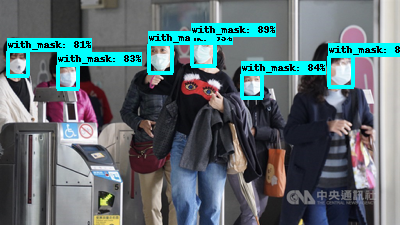

/content/Tensorflow-Object-Detection/images/maksssksksss45.png


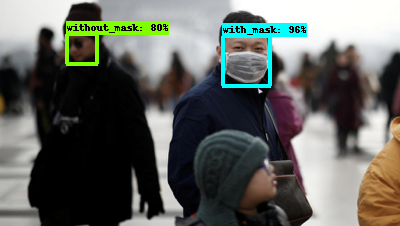

/content/Tensorflow-Object-Detection/images/maksssksksss116.png


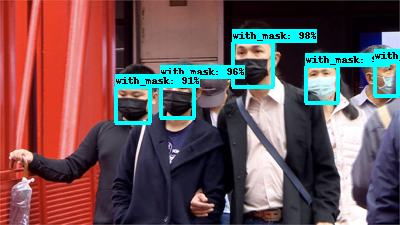

/content/Tensorflow-Object-Detection/images/maksssksksss553.png


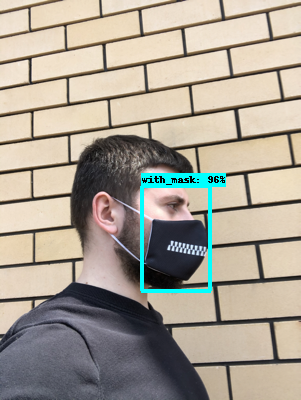

/content/Tensorflow-Object-Detection/images/maksssksksss686.png


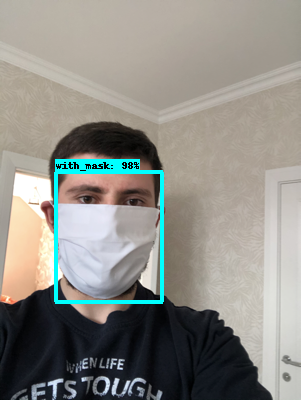

In [47]:
# Run the detector on image samples

import random
import cv2
import glob
from google.colab.patches import cv2_imshow

# Images from this path will be considered for testing
# Change the extension accordingly if your dataset is not png
TEST_IMAGE_PATHS = glob.glob(DATASET_PATH + 'images/*.png')

# Change the value of k to the number of images to be considered for testing
try:
    images = random.sample(TEST_IMAGE_PATHS, k=5)
except:
  # Exception incase the value of k is higher than available samples
    images = TEST_IMAGE_PATHS


for image_path in images:
    print(image_path)
    image_np = load_image_into_numpy_array(image_path)
        
    input_tensor = tf.convert_to_tensor(
            np.expand_dims(image_np, 0), dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'][0].numpy(),
                (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
                detections['detection_scores'][0].numpy(),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=.6,
                agnostic_mode=False,
    )

    cv2_imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))

In [ ]:
# If you would like to test the model on your data, 
# create a folder named custom data and manually upload your files here

!mkdir {DATASET_PATH}custom_data
%cd {DATASET_PATH}custom_data

# Upload the images from your local files; you can upload multiple images at once

from google.colab import files
files.upload()

/content/Tensorflow-Object-Detection/custom_data


In [1]:
# Same test cell from above, only image extension is changed


import random
import cv2
from google.colab.patches import cv2_imshow

TEST_IMAGE_PATHS = glob.glob(DATASET_PATH + "custom_data/*.*")

images = TEST_IMAGE_PATHS
for image_path in images:
    print(image_path)
    try:
        image_np = load_image_into_numpy_array(image_path)
    except:
        print("Invalid Image format:", image_path)
        continue
        
    input_tensor = tf.convert_to_tensor(
            np.expand_dims(image_np, 0), dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'][0].numpy(),
                (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
                detections['detection_scores'][0].numpy(),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=.6,
                agnostic_mode=False,
    )

    cv2_imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))


# Removed output to hide my model

NameError: ignored

In [2]:
# Download your trained model for future use or integration in other projects

!zip -r /content/model.zip {MODEL_TEST}

from google.colab import files
files.download("/content/model.zip")

	zip warning: name not matched: {MODEL_TEST}

zip error: Nothing to do! (try: zip -r /content/model.zip . -i {MODEL_TEST})


FileNotFoundError: ignored